## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('../data/AB_NY_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

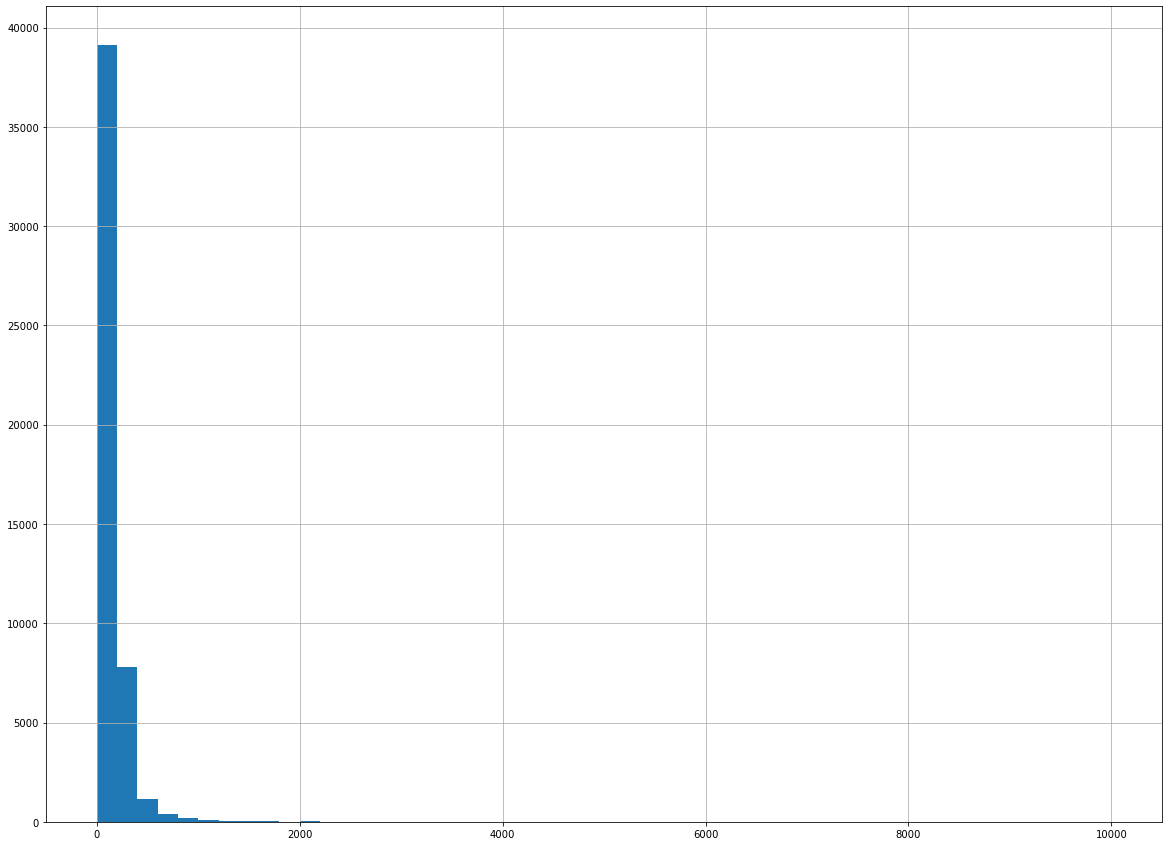

In [3]:
df['price'].hist(figsize=(20,15), bins=50)

In [4]:
df['price'] = np.log1p(df['price'])

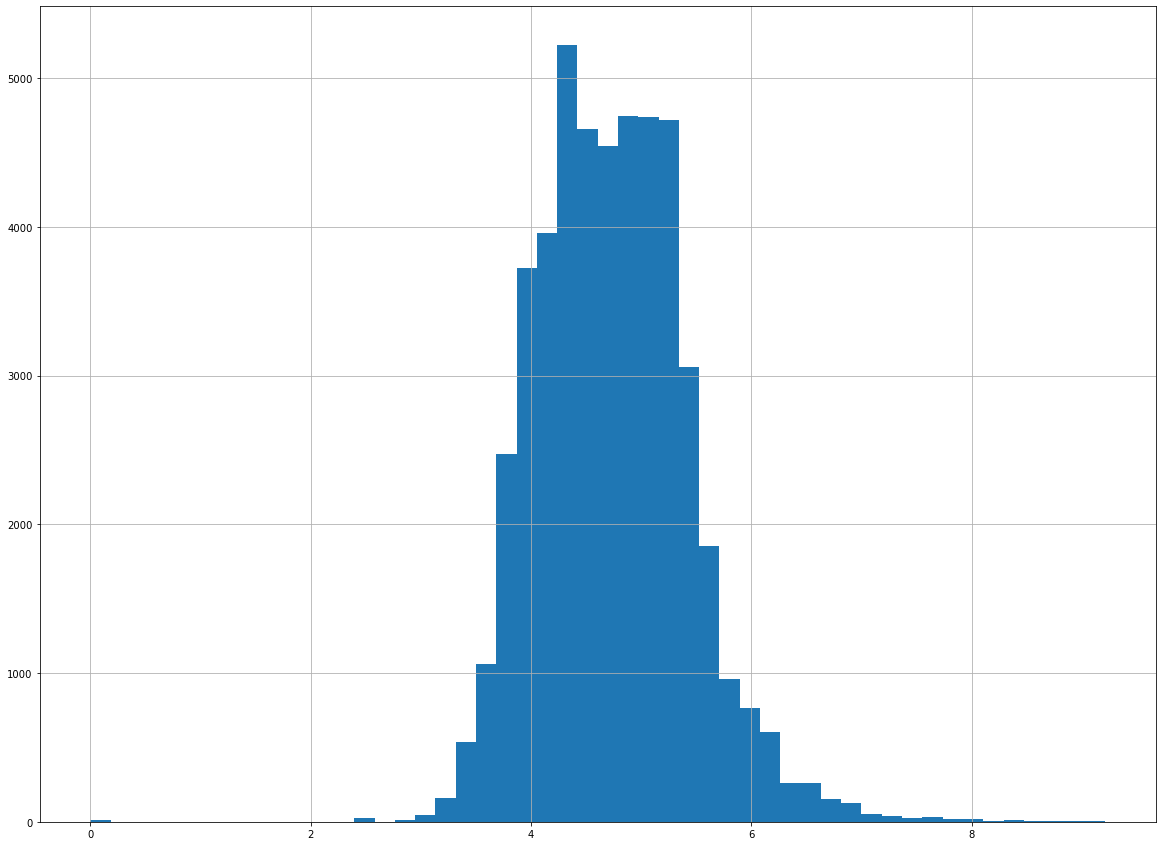

In [5]:
df['price'].hist(figsize=(20,15), bins=50)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [8]:
y_full_train = df_full_train.pop('price')
y_train = df_train.pop('price')
y_val = df_val.pop('price')
y_test = df_test.pop('price')

Now, use `DictVectorizer` to turn train and validation into matrices:

In [9]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [11]:
!conda install python-graphviz -y

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /Users/a844494/.pyenv/versions/anaconda3-4.3.1/envs/conda_test:

The following NEW packages will be INSTALLED:

    python-graphviz: 0.5.2-py36_0

python-graphvi 100% |################################| Time: 0:00:00   4.02 MB/s


In [12]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from IPython.display import SVG
from graphviz import Source

In [13]:
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

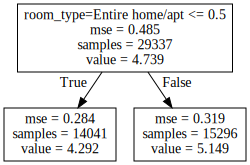

In [17]:
graph = Source(export_graphviz(tree, out_file=None, feature_names=list(dv.get_feature_names())))
SVG(graph.pipe(format='svg'))

In [ ]:
# print(export_text(tree, feature_names=list(dv.get_feature_names_out())))

Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [19]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [20]:
y_pred = rf.predict(X_val)

In [21]:
np.sqrt(mean_squared_error(y_val, y_pred))

0.46083844287427406

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [22]:
for n_est in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n_est, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rsme = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f'n_estimators: {n_est:.0f} - {rsme:.4f}')

n_estimators: 10 - 0.4608
n_estimators: 20 - 0.4475
n_estimators: 30 - 0.4444
n_estimators: 40 - 0.4427
n_estimators: 50 - 0.4418
n_estimators: 60 - 0.4412
n_estimators: 70 - 0.4406
n_estimators: 80 - 0.4407
n_estimators: 90 - 0.4402
n_estimators: 100 - 0.4396
n_estimators: 110 - 0.4392
n_estimators: 120 - 0.4390
n_estimators: 130 - 0.4391
n_estimators: 140 - 0.4390
n_estimators: 150 - 0.4388
n_estimators: 160 - 0.4387
n_estimators: 170 - 0.4386
n_estimators: 180 - 0.4387
n_estimators: 190 - 0.4386
n_estimators: 200 - 0.4386


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [23]:
scores = []
for depth in [10, 15, 20, 25]:
    for n_est in range(10, 201, 10):
            rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, random_state=1, n_jobs=-1)
            rf.fit(X_train, y_train)

            y_pred = rf.predict(X_val)
            rsme = np.sqrt(mean_squared_error(y_val, y_pred))
            scores.append((n_est, depth, rsme))
            # print(f'n_estimators: {n_est:.0f} - {depth:.0f} - {rsme:.4f}')

In [24]:
df_scores = pd.DataFrame(scores, columns=['n_estimator', 'max_depth', 'rmse'])

In [25]:
df_scores.sort_values(by='rmse').head(20)

,n_estimator,max_depth,rmse
36,170,15,0.435874
35,160,15,0.435961
39,200,15,0.436029
38,190,15,0.436067
37,180,15,0.436072
33,140,15,0.436138
31,120,15,0.436144
30,110,15,0.436145
34,150,15,0.436145
32,130,15,0.436211


What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [26]:
rf = RandomForestRegressor(n_estimators=20, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [29]:
pd.DataFrame(rf.feature_importances_, index=list(dv.get_feature_names()), columns=['importance']).sort_values(by='importance')

,importance
neighbourhood_group=Staten Island,0.000141
neighbourhood_group=Bronx,0.000285
neighbourhood_group=Brooklyn,0.001093
neighbourhood_group=Queens,0.001227
room_type=Private room,0.003961
room_type=Shared room,0.005256
calculated_host_listings_count,0.031151
neighbourhood_group=Manhattan,0.034719
number_of_reviews,0.042904
reviews_per_month,0.052804


What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [10]:
!pip install xgboost==1.4.2

  Using cached xgboost-1.4.2-py3-none-macosx_10_14_x86_64.macosx_10_15_x86_64.macosx_11_0_x86_64.whl (1.2 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.5.0
    Uninstalling xgboost-1.5.0:
      Successfully uninstalled xgboost-1.5.0
You should consider upgrading via the '/Users/a844494/.pyenv/versions/3.9.6/envs/zoomcamp/bin/python3.9 -m pip install --upgrade pip' command.


In [30]:
import xgboost as xgb
from xgboost import XGBRegressor

In [31]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score

In [32]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [33]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [36]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

scores = {}
for eta in [0.01, 0.1, 0.3]:
    xgb_params['eta'] = eta
    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                      evals=watchlist)
    y_pred = model.predict(dval)
    scores[eta] = np.sqrt(mean_squared_error(y_val, y_pred))

[0]	train-rmse:4.25336	val-rmse:4.25010
[5]	train-rmse:4.04779	val-rmse:4.04454
[10]	train-rmse:3.85242	val-rmse:3.84921
[15]	train-rmse:3.66674	val-rmse:3.66359
[20]	train-rmse:3.49030	val-rmse:3.48719
[25]	train-rmse:3.32263	val-rmse:3.31956
[30]	train-rmse:3.16332	val-rmse:3.16029
[35]	train-rmse:3.01196	val-rmse:3.00898
[40]	train-rmse:2.86817	val-rmse:2.86533
[45]	train-rmse:2.73158	val-rmse:2.72884
[50]	train-rmse:2.60185	val-rmse:2.59925
[55]	train-rmse:2.47865	val-rmse:2.47612
[60]	train-rmse:2.36167	val-rmse:2.35927
[65]	train-rmse:2.25061	val-rmse:2.24835
[70]	train-rmse:2.14519	val-rmse:2.14303
[75]	train-rmse:2.04514	val-rmse:2.04311
[80]	train-rmse:1.95022	val-rmse:1.94827
[85]	train-rmse:1.86015	val-rmse:1.85833
[90]	train-rmse:1.77472	val-rmse:1.77302
[95]	train-rmse:1.69373	val-rmse:1.69214
[99]	train-rmse:1.63198	val-rmse:1.63045
[0]	train-rmse:3.87217	val-rmse:3.86889
[5]	train-rmse:2.31905	val-rmse:2.31692
[10]	train-rmse:1.41910	val-rmse:1.41786
[15]	train-rmse:0.91

Now change `eta` first to `0.1` and then to `0.01`

In [37]:
scores

{0.01: 1.630452438951798, 0.1: 0.43249655247991464, 0.3: 0.43621034591295677}

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

